# SSS plots

In [4]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
#import pooch
from glob import glob
from dateutil import parser
import cartopy.crs as ccrs      
import cartopy #import projections
import gsw
import cftime
import datetime as dt
from xmovie import Movie
from xmovie.presets import rotating_globe

In [24]:
path='/Users/lfp/Desktop/DATASET/SSS data/2016/*.nc'
file = '/Users/lfp/Desktop/SSH/c3s_obs-sl_glo_phy-ssh_my_twosat-l4-duacs-0.25deg_P1D_1649023037640.nc'


In [25]:
ds = xr.open_mfdataset(path,concat_dim='time',combine='nested')
ds

<xarray.Dataset>
Dimensions:               (lon: 1440, lat: 720, time: 366)
Coordinates:
  * lon                   (lon) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat                   (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * time                  (time) datetime64[ns] 2016-01-01T12:00:00 ... 2016-...
Data variables:
    nobs                  (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs_40km             (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sss_smap              (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sss_smap_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sss_smap_40km         (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sss_ref               (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    gland                 (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fland                 (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    gice                  (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    surtep                (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/58)
    Conventions:                                    CF-1.6, ACDD-1.3
    standard_name_vocabulary:                       CF Standard Name Table v27
    title:                                          SMAP ocean surface salinity
    version:                                        V4.0 Validated Release
    processing_level:                               L3
    resolution:                                     Spatial resolution: appro...
    ...                                             ...
    qc_exclusions:                                  discard observations if o...
    Source of SMAP SSS:                             Meissner, T., F. Wentz, A...
    Source of  ancillary reference SSS from HYCOM:  Hybrid Coordinate Ocean M...
    Source of ancillary SST:                        Canada Meteorological Cen...
    Source of ancillary AMSR2 sea ice mask:         RSS AMSR2 sea-ice mask. W...
    Source of ancillary land mask:                  1 km land/water mask from...

In [26]:
ds1 = xr.open_dataset(file)  #Current Dataset
ds1

<xarray.Dataset>
Dimensions:         (time: 366, latitude: 81, longitude: 81, nv: 2)
Coordinates:
  * latitude        (latitude) float32 4.875 5.125 5.375 ... 24.38 24.62 24.88
  * nv              (nv) int32 0 1
  * time            (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
  * longitude       (longitude) float32 79.88 80.12 80.38 ... 99.38 99.62 99.88
Data variables: (12/14)
    ugos            (time, latitude, longitude) float64 ...
    vgos            (time, latitude, longitude) float64 ...
    vgosa           (time, latitude, longitude) float64 ...
    crs             int32 ...
    err_vgosa       (time, latitude, longitude) float64 ...
    sla             (time, latitude, longitude) float64 ...
    ...              ...
    flag_ice        (time, latitude, longitude) float64 ...
    adt             (time, latitude, longitude) float64 ...
    err_ugosa       (time, latitude, longitude) float64 ...
    tpa_correction  (time) float64 ...
    err_sla         (time, latitude, longitude) float64 ...
    lon_bnds        (longitude, nv) float32 ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        http://climate.copernicus...
    creator_email:                                  http://climate.copernicus...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2021-08-02T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2021-08-01T12:00:00Z
    title:                                          DT merged two satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [27]:
lon, lat= np.meshgrid(ds1.longitude, ds1.latitude)
u = np.squeeze(ds1.ugos).values
v = np.squeeze(ds1.vgos).values

In [28]:
ds = ds.sel(lon=slice(80,100),lat=slice(5,25))

In [29]:
%matplotlib inline  
#%matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '/Users/lfp/Documents/GitHub/satellite_python_2022V2/plots/SSS_SSH_plots/'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1

/Users/lfp/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


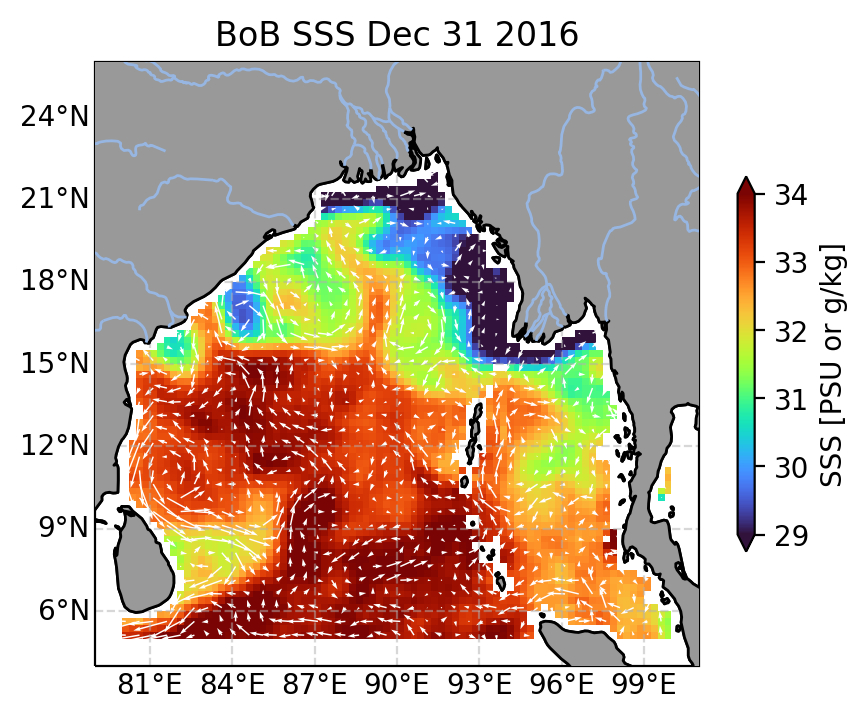

In [30]:
for i in range(len(ds.time)):
    
    plt.close('all')
    
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
    day_str=ds.time.dt.strftime("%b %d %Y").values[i]
    #ax.set_title(f'BoB SST {str(ds.isel(time=i).time)[-10:]}')
    ax.set_title(f'BoB SSS '+day_str)
    
    
    plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
    plt.set_cmap(cmap=plt.get_cmap('turbo'))
    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.ylabels_right = False

    levels = 10
    
    cs = ax.pcolormesh(ds.lon,ds.lat,np.squeeze(ds.isel(time=i).sss_smap), vmin=29,vmax=34, transform=ccrs.PlateCarree())
    
    cb = plt.colorbar(cs,fraction = 0.022, extend='both') 
    cb.set_label('SSS [PSU or g/kg]',fontsize = 10)
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
    ax.add_feature(cartopy.feature.RIVERS,zorder=5)
    
    NumberSkip =2 
    q = ax.quiver(lon[1:-1:NumberSkip,1:-1:NumberSkip], lat[1:-1:NumberSkip,1:-1:NumberSkip], u[i,1:-1:NumberSkip,1:-1:NumberSkip], v[i,1:-1:NumberSkip,1:-1:NumberSkip], scale = 15, facecolor = 'white', transform=ccrs.PlateCarree()) 
    
    #ax.set_extent([80,100,5,25]) #Set a specific location [xmin, xmax, ymin, ymax]
  
    plt.savefig(__figdir__+f'SSSH{i:03d}'+'.'+plotfiletype,**savefig_args)
    #plt.clf()


In [3]:
 fig,axs= plt.subplots(2,2,figsize=(25,20)
    
    
axs[0,0].plot(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
    

SyntaxError: invalid syntax (1644524105.py, line 4)

In [1]:
day_str=ds.time.dt.strftime("%b %d %Y").values[i]
    #ax.set_title(f'BoB SST {str(ds.isel(time=i).time)[-10:]}')
    ax.set_title(f'BoB SSS '+day_str)
    
    
    plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
    plt.set_cmap(cmap=plt.get_cmap('turbo'))
    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.ylabels_right = False

    levels = 10
    
    cs = ax.pcolormesh(ds.lon,ds.lat,np.squeeze(ds.isel(time=i).sss_smap), vmin=29,vmax=34, transform=ccrs.PlateCarree())
    
    cb = plt.colorbar(cs,fraction = 0.022, extend='both') 
    cb.set_label('SSS [PSU or g/kg]',fontsize = 10)
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
    ax.add_feature(cartopy.feature.RIVERS,zorder=5)
    
    NumberSkip =2 
    q = ax.quiver(lon[1:-1:NumberSkip,1:-1:NumberSkip], lat[1:-1:NumberSkip,1:-1:NumberSkip], u[i,1:-1:NumberSkip,1:-1:NumberSkip], v[i,1:-1:NumberSkip,1:-1:NumberSkip], scale = 15, facecolor = 'white', transform=ccrs.PlateCarree()) 
    
    #ax.set_extent([80,100,5,25]) #Set a specific location [xmin, xmax, ymin, ymax]
  
    plt.savefig(__figdir__+f'SSSH{i:03d}'+'.'+plotfiletype,**savefig_args)
    #plt.clf()


IndentationError: unexpected indent (3447200929.py, line 3)

In [31]:
!ffmpeg -framerate 15 -i $__figdir__/SSSH%03d.png -s 1920x1080 $__figdir__/sss_2016_BoB.avi -y #make a video using ffmpeg


ffmpeg version N-105691-gc439c6b191-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static